# Defining the Question

The Data Analytical Question.



> Investigate the financial inclusion in East Africa by figuring out which individuals are most likely to have or use a bank account.



The Metric for Success.


> The solution will help provide an indication of the state of financial inclusion in East Africa while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.



Context.


> Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.


> Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.





The datasets provided are:


> Variable Definition: [ [ link ] ](http://bit.ly/VariableDefinitions)


> Dataset: [ [ link ] ](http://bit.ly/FinancialDataset)





# Reading the Dataset

In [0]:
# Loading the Data from the source i.e. csv
# ---
# Dataset url = http://bit.ly/CancerSurvivalDataset
# ---
# ---
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

finance = pd.read_csv('Financial Dataset.csv')

# Checking the Data


In [221]:
# Determining the no. of records in our dataset
finance.shape

(23524, 13)

In [222]:
# Checking the dataset statistics
finance.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [223]:
# Previewing the top of our dataset
finance.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [224]:
# Previewing the bottom of our dataset
finance.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [225]:
# Checking whether each column has an appropriate data type
finance.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

# Tidying the Dataset

In [226]:
# Standardizing the columns
finance.columns = finance.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('.', '_').str.replace(',','')
finance.head()

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relathip_with_head,marital_status,level_of_educuation,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [0]:
# Rename misspelled columns
finance.rename(columns={'the_relathip_with_head':'relationship_with_head','level_of_educuation':'level_of_education'}, inplace=True)


In [0]:
# Dropping irrelevant columns
finance.drop(columns='uniqueid',inplace=True)


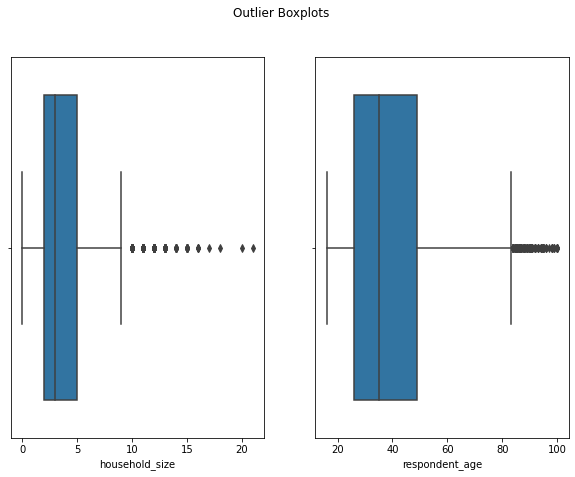

In [229]:
# Checking for outliers
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 7))
fig.suptitle('Outlier Boxplots')
sns.boxplot(finance['household_size'], ax=ax1)
sns.boxplot(finance['respondent_age'], ax=ax2)
plt.show()

In [230]:
# Checking for anomalies

q1 = finance.quantile(.25)
q3 = finance.quantile(.75)

iqr=q3-q1
print(iqr)

year               2.0
household_size     3.0
respondent_age    23.0
dtype: float64


In [231]:
print((finance < (q1-1.5 * iqr)) | ( finance > q3 + 1.5 * iqr))

       cell_phone_access  country  ...  type_of_location   year
0                  False    False  ...             False  False
1                  False    False  ...             False  False
2                  False    False  ...             False  False
3                  False    False  ...             False  False
4                  False    False  ...             False  False
...                  ...      ...  ...               ...    ...
23519              False    False  ...             False  False
23520              False    False  ...             False  False
23521              False    False  ...             False  False
23522              False    False  ...             False  False
23523              False    False  ...             False  False

[23524 rows x 12 columns]


In [232]:
finance.shape

(23524, 12)

In [233]:
# Deleting the Outliers
fin2= finance[~((finance < (q1 - 1.5 * iqr)) |(finance > (q3 + 1.5 * iqr))).any(axis=1)]
print(fin2.shape)

(22903, 12)


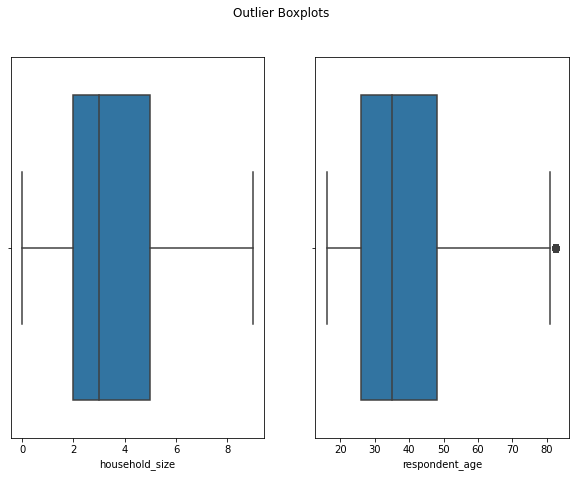

In [234]:
# Checking for outliers after deletion of outliers
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 7))
fig.suptitle('Outlier Boxplots')
sns.boxplot(fin2['household_size'], ax=ax1)
sns.boxplot(fin2['respondent_age'], ax=ax2)
plt.show()

In [235]:
# check for duplicated data
fin2.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
23518    False
23519    False
23520    False
23521    False
23522    False
Length: 22903, dtype: bool

In [236]:
fin2.isnull().sum()

country                   14
year                       0
has_a_bank_account        36
type_of_location          15
cell_phone_access         11
household_size            27
respondent_age            33
gender_of_respondent      33
relationship_with_head     4
marital_status            31
level_of_education        29
type_of_job               30
dtype: int64

In [237]:
# Filling in the missing values with mean and mode.
fin2['country'].fillna(fin2['country'].mode())
fin2['gender_of_respondent'].fillna(fin2['gender_of_respondent'].mode())
fin2['has_a_bank_account'].fillna(fin2['has_a_bank_account'].mode())
fin2['household_size'].fillna(fin2['household_size'].mean())
fin2['level_of_education'].fillna(fin2['level_of_education'].mode())
fin2['marital_status'].fillna(fin2['marital_status'].mode())
fin2['relationship_with_head'].fillna(fin2['relationship_with_head'].mode())
fin2['respondent_age'].fillna(fin2['respondent_age'].mean())
fin2['type_of_job'].fillna(fin2['type_of_job'].mode())
fin2['type_of_location'].fillna(fin2['type_of_location'].mode())
fin2['cell_phone_access'].fillna(fin2['cell_phone_access'].mode())

0        Yes
1         No
2        Yes
3        Yes
4         No
        ... 
23518    Yes
23519    Yes
23520    Yes
23521    Yes
23522    Yes
Name: cell_phone_access, Length: 22903, dtype: object

In [238]:
fin2.isnull().sum()

country                   14
year                       0
has_a_bank_account        36
type_of_location          15
cell_phone_access         11
household_size            27
respondent_age            33
gender_of_respondent      33
relationship_with_head     4
marital_status            31
level_of_education        29
type_of_job               30
dtype: int64

# Exploratory Analysis

## Univariate Analysis

Text(0, 0.5, 'Population')

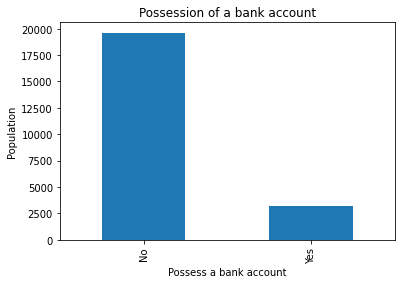

In [239]:
fin2['has_a_bank_account'].value_counts().plot.bar()

plt.title('Possession of a bank account')

plt.xlabel('Possess a bank account')
plt.ylabel('Population')

Text(0.5, 1.0, 'East African Countries')

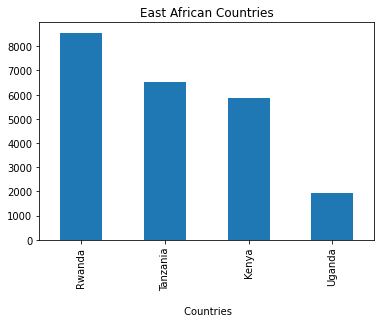

In [240]:
fin2['country'].value_counts().plot.bar()

plt.xlabel('\n Countries')
plt.title('East African Countries')

Text(0.5, 1.0, 'Residing Location of Population')

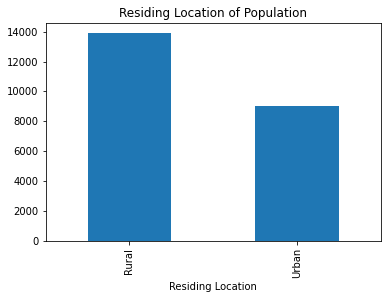

In [241]:
fin2['type_of_location'].value_counts().plot.bar()

plt.xlabel('Residing Location')
plt.title('Residing Location of Population')

Text(0.5, 1.0, 'Population vs Phone Access')

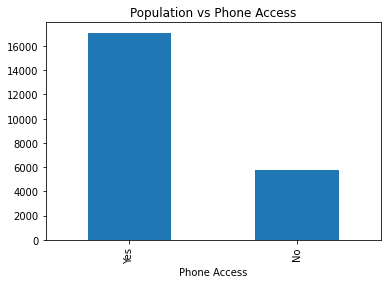

In [242]:
fin2['cell_phone_access'].value_counts().plot.bar()

plt.xlabel('Phone Access')
plt.title('Population vs Phone Access')

Text(0.5, 1.0, 'Household Size vs Population')

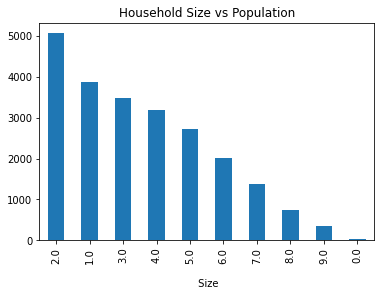

In [243]:
fin2['household_size'].value_counts().plot.bar()

plt.xlabel('\n Size')
plt.title('Household Size vs Population')

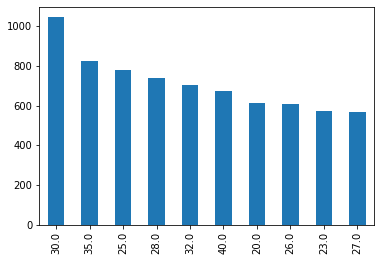

In [244]:
fin2['respondent_age'].value_counts().head(10).plot.bar()

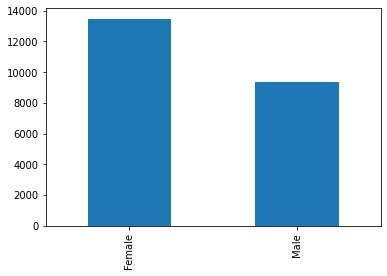

In [245]:
fin2['gender_of_respondent'].value_counts().plot.bar()


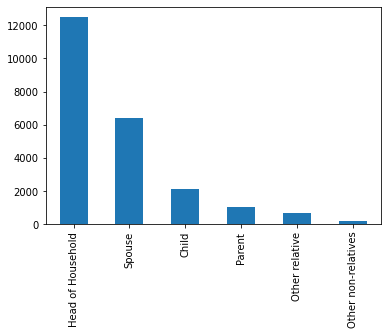

In [246]:
fin2['relationship_with_head'].value_counts().plot.bar()


Text(0.5, 0, 'Status')

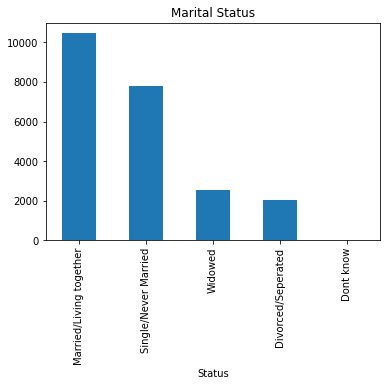

In [247]:
fin2['marital_status'].value_counts().plot.bar()

plt.title('Marital Status')
plt.xlabel('Status')

Text(0.5, 1.0, 'Type of Education \n')

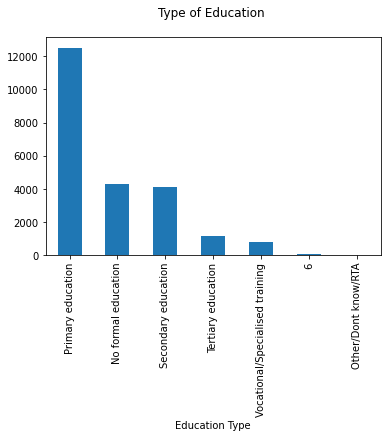

In [248]:
fin2['level_of_education'].value_counts().plot.bar()

plt.xlabel('Education Type')
plt.title('Type of Education \n')

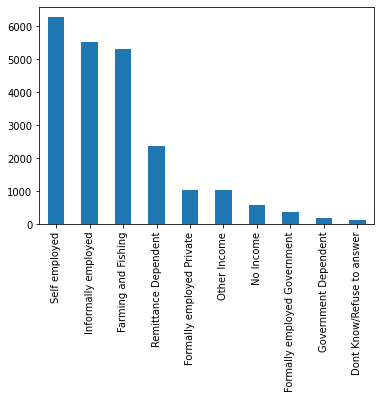

In [249]:
fin2['type_of_job'].value_counts().plot.bar()


### Measures Of Central Tendencies

In [250]:
# Mean
print('The averaged household size is:', {fin2['household_size'].mean()})
print('The averaged age of a respondent is:', {fin2['respondent_age'].mean()})

The averaged household size is: {3.573395698548697}
The averaged age of a respondent is: {38.34508089199825}


In [251]:
# Median
print('The median household size is:', {fin2['household_size'].median()})
print('The median age of a respondent is:', {fin2['respondent_age'].median()})

The median household size is: {3.0}
The median age of a respondent is: {35.0}


In [0]:
# Mode
#print('The modal household size is:', {fin2['household_size'].mode()})
#print('The modal age of a respondent is:', {fin2['respondent_age'].mode()})

### Measure Of Dispersion

In [253]:
# Standard Deviation
print('Standard deviation of household size is:', {fin2['household_size'].std()})
print('Standard deviation of age of a respondent is:', {fin2['respondent_age'].std()})

Standard deviation of household size is: {2.07978318144993}
Standard deviation of age of a respondent is: {15.804022763001404}


In [254]:
# Variance
print('Variance of household size is:', {fin2['household_size'].var()})
print('Variance of age of a respondent is:', {fin2['respondent_age'].var()})

Variance of household size is: {4.325498081841992}
Variance of age of a respondent is: {249.76713549346655}


In [255]:
# Range
# Standard Deviation
hse_max = fin2['household_size'].max()
hse_min = fin2['household_size'].min()
print('The range of household size is:', hse_max - hse_min)


age_max = fin2['respondent_age'].max()
age_min = fin2['respondent_age'].min()
print('The range of respondent age is:', age_max - age_min)


The range of household size is: 9.0
The range of respondent age is: 67.0


In [256]:
# Quantile

print(fin2['respondent_age'].quantile([0.25,0.5,0.75]))
print('########################################################')
print(fin2['household_size'].quantile([0.25,0.5,0.75]))

0.25    26.0
0.50    35.0
0.75    48.0
Name: respondent_age, dtype: float64
########################################################
0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64


In [257]:
# Skew
print(fin2['respondent_age'].skew())
print('########################################################')
print(fin2['household_size'].skew())

0.7409754960713362
########################################################
0.6107328357162268


In [258]:
# Kurtoisis
print(fin2['respondent_age'].kurt())
print('########################################################')
print(fin2['household_size'].kurt())

-0.23634544791914935
########################################################
-0.49930440433763623


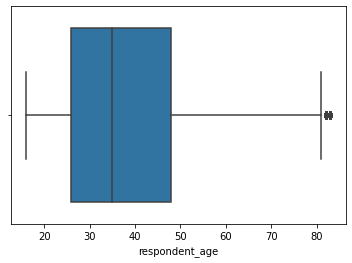

In [259]:
# Box plot
sns.boxplot(fin2['respondent_age'])

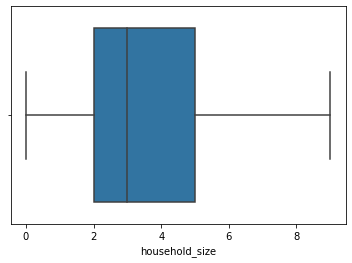

In [260]:
sns.boxplot(fin2['household_size'])

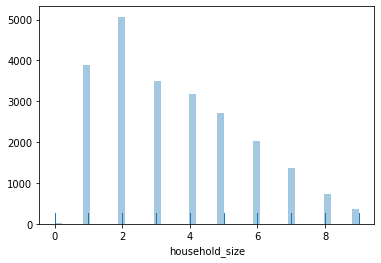

In [261]:
# Histograms
sns.distplot(fin2['household_size'], kde=False, rug=True)

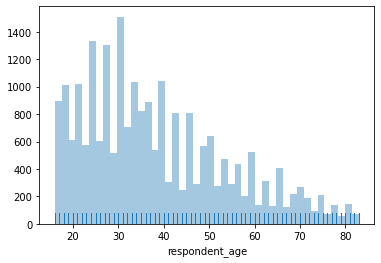

In [262]:
sns.distplot(fin2['respondent_age'], kde=False, rug=True)

In [263]:
print(finance['country'].value_counts())
print('########################')
print(finance['country'].unique())

Rwanda      8735
Tanzania    6606
Kenya       6068
Uganda      2101
Name: country, dtype: int64
########################
['Kenya' 'Rwanda' 'Tanzania' nan 'Uganda']


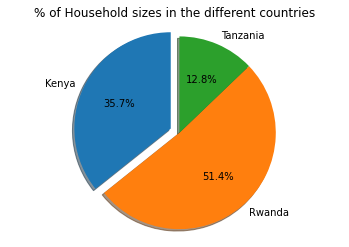

In [264]:

# Distribution of household sizes
country = ['Kenya', 'Rwanda', 'Tanzania']
household = [6068, 8735, 2180]
explode = [0.1, 0, 0]
# 
plt.pie(household, labels=country, explode=explode, autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.title('% of Household sizes in the different countries')
plt.show()

## Bivariate Analysis

In [265]:
# Checking the strength of the correlation between numerical variables.
fin2.corr()

,year,household_size,respondent_age
year,1.000000,-0.097401,-0.024005
household_size,-0.097401,1.000000,-0.106239
respondent_age,-0.024005,-0.106239,1.000000


<function matplotlib.pyplot.show>

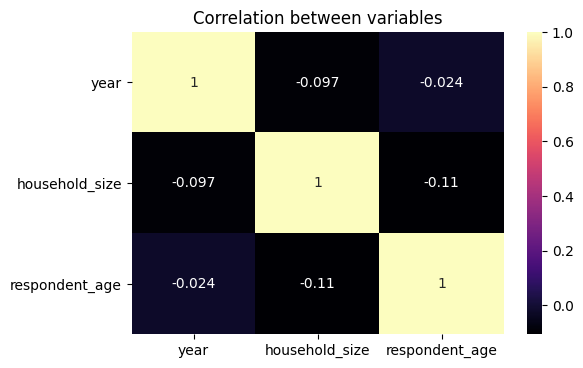

In [266]:
# Looking for correlation between the variables
plt.figure(dpi=100)
cor=fin2.corr()
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns, annot = True ,cmap='magma')
plt.title('Correlation between variables')
plt.show

In [267]:
fin2.columns

Index(['country', 'year', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'level_of_education', 'type_of_job'],
      dtype='object')

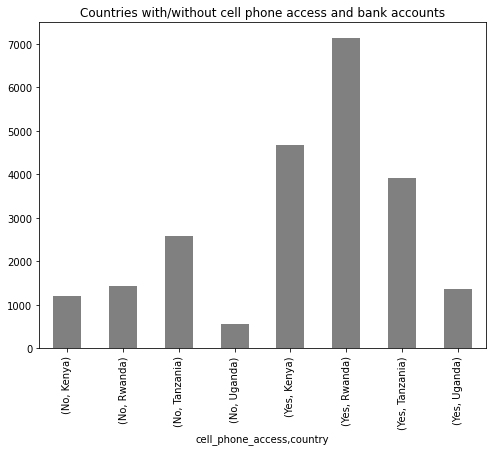

In [268]:
# Checking relation between cell phone possession and ownership of a bank account in each country
fin3 = fin2.groupby (['cell_phone_access','country'])['has_a_bank_account'].count()
plt.title('Countries with/without cell phone access and bank accounts')
fin3.plot(kind='bar',  color='gray', figsize=(8, 6), stacked=True)

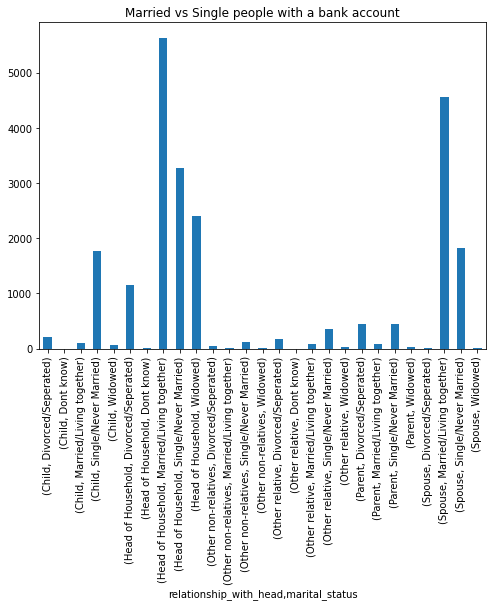

In [269]:
# checking relation of marital status and head of household to ownership of a bank account
fina=fin2.groupby (['relationship_with_head','marital_status'])['has_a_bank_account'].count()
plt.title('Married vs Single people with a bank account')
fina.plot(kind='bar', figsize=(8, 6), stacked=True)

## Multivariate Analysis

### PCA

In [318]:
fin2.head()

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of_education,type_of_job
0,Kenya,2018,Yes,1.0,1.0,3.0,24.0,0.0,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,1.0,0.0,5.0,70.0,0.0,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,0.0,1.0,5.0,26.0,1.0,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,1.0,1.0,5.0,34.0,0.0,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,0.0,0.0,8.0,26.0,1.0,Child,Single/Never Married,Primary education,Informally employed


In [319]:
# Conversions
############
# Type of location - rural / urban
# Cell phone access - yes / no
# Gender - male / female
##########
# Household size
# Respondent Age

print(fin2['type_of_location'].value_counts())
print(fin2['cell_phone_access'].value_counts())
print(fin2['gender_of_respondent'].value_counts())

1.0    13810
0.0     8915
Name: type_of_location, dtype: int64
1.0    16985
0.0     5740
Name: cell_phone_access, dtype: int64
0.0    13397
1.0     9328
Name: gender_of_respondent, dtype: int64


In [320]:
# Mapping the elements we want to replace with 0 & 1 to create our features

map_loc = {
    'Rural': 1,
    'Urban': 0
}

map_phone = {
    'Yes': 1,
    'No': 0
}

map_gender = {
    'Male': 1,
    'Female': 0
}

##
fin2['type_of_location'] = fin2['type_of_location'].map(map_loc)
fin2['cell_phone_access'] = fin2['cell_phone_access'].map(map_phone)
fin2['gender_of_respondent'] = fin2['gender_of_respondent'].map(map_gender)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [321]:
fin2.head()

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of_education,type_of_job
0,Kenya,2018,Yes,NaN,NaN,3.0,24.0,NaN,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,NaN,NaN,5.0,70.0,NaN,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,NaN,NaN,5.0,26.0,NaN,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,NaN,NaN,5.0,34.0,NaN,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,NaN,NaN,8.0,26.0,NaN,Child,Single/Never Married,Primary education,Informally employed


In [0]:
# Step 3: Preprocessing
# 
# 
X = fin2.iloc[:,3:8].values # features
y = fin2.iloc[:,2].values # labels

# Cleaning dataset by removing NaN
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputerX = imputer.fit(X)
X = imputerX.transform(X)



In [0]:
# Step 4: Splitting the dataset into the Training set and Test set
#
#
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
# Step 5: Normalization
# 
# 
from sklearn.preprocessing import StandardScaler

In [0]:
# Step 6: Applying PCA
#
# 
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [326]:
# Step 7: Explained Variance Ratio
#
# 
explained_variance = pca.explained_variance_ratio_

explained_variance

array([0.98315168, 0.01684832])

In [0]:
# Step 8: Using 1 Principal Component
# Let's first try to use 1 principal component to train our algorithm. To do so, execute the following code:
# 
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


In [0]:
# Step 9: Training and Making Predictions
# In this case we'll use random forest classification for making the predictions.
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [329]:
# Step 10: Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy ---> ' , accuracy_score(y_test, y_pred))

[[3896    0]
 [ 649    0]]
Accuracy --->  0.8572057205720572


### Factor Analysis

In [284]:
# Step 1: Previewing the dataset columns
# 
fin2.columns

Index(['country', 'year', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'level_of_education', 'type_of_job'],
      dtype='object')

In [0]:
# Picking necessary columns 
# 
fin_fa = fin2.iloc[:,3:8]

In [0]:
# Dropping missing values rows
#
fin_fa.dropna(inplace=True)

In [295]:
# Checking the datatypes
# 
fin_fa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22725 entries, 0 to 23522
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type_of_location      22725 non-null  float64
 1   cell_phone_access     22725 non-null  float64
 2   household_size        22725 non-null  float64
 3   respondent_age        22725 non-null  float64
 4   gender_of_respondent  22725 non-null  float64
dtypes: float64(5)
memory usage: 1.0 MB


In [296]:
# Previewing our dataset
# 
fin_fa.head()

,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent
0,1.0,1.0,3.0,24.0,0.0
1,1.0,0.0,5.0,70.0,0.0
2,0.0,1.0,5.0,26.0,1.0
3,1.0,1.0,5.0,34.0,0.0
4,0.0,0.0,8.0,26.0,1.0


In [291]:
# Installing factor analyzer 
pip install factor_analyzer==0.2.3

In [297]:
# Adequacy Test
# Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis.
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(fin_fa)
chi_square_value, p_value

(3121.635934088209, 0.0)

In [301]:
fin_fa.shape

(22725, 5)

In [0]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(fin_fa)

In [305]:
# 
# 
from factor_analyzer.factor_analyzer import FactorAnalyzer
# Creating factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.analyze(fin_fa, rotation=None)

# Checking the Eigenvalues
ev, v = fa.get_eigenvalues()
ev


,Original_Eigenvalues
0,1.362469
1,1.081207
2,1.030269
3,0.851908
4,0.674148


In [330]:
dir(fa)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_fit_ml_objective',
 '_fit_uls_objective',
 '_normalize_ml',
 '_normalize_wls',
 'analyze',
 'corr',
 'fit_factor_analysis',
 'get_communalities',
 'get_eigenvalues',
 'get_factor_variance',
 'get_scores',
 'get_uniqueness',
 'loadings',
 'log_warnings',
 'phi',
 'remove_non_numeric',
 'rotation_matrix',
 'smc',
 'structure']

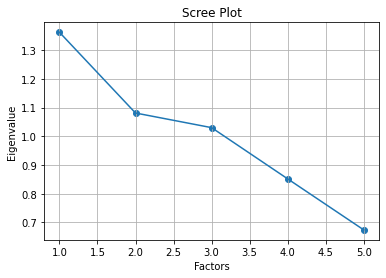

In [306]:
# The scree plot method draws a straight line for each factor and its eigenvalues. 
# Number eigenvalues greater than one considered as the number of factors.

# Creating a scree plot using matplotlib
#
plt.scatter(range(1,fin_fa.shape[1]+1),ev)
plt.plot(range(1,fin_fa.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [308]:
# Creating factor analysis object and perform factor analysis
#
fa = FactorAnalyzer()
fa.analyze(fin_fa, rotation="varimax")
fa.loadings

,Factor1,Factor2,Factor3
type_of_location,0.679060,0.107915,0.006930
cell_phone_access,0.146382,-0.113961,0.337309
household_size,0.445019,-0.152846,0.081438
respondent_age,-0.024804,0.609451,-0.024783
gender_of_respondent,-0.029052,0.036523,0.331420


In [309]:
# Performing factor analysis for 5 factors
# Create factor analysis object and perform factor analysis using 5 factors
fa = FactorAnalyzer()
fa.analyze(fin_fa, 5, rotation="varimax")
fa.loadings

,Factor1,Factor2,Factor3,Factor4,Factor5
type_of_location,0.565333,0.155735,-0.063546,0.159965,0.0
cell_phone_access,0.116144,-0.126504,0.213019,0.356446,0.0
household_size,0.567052,-0.211918,0.057165,0.014547,0.0
respondent_age,-0.016342,0.458773,0.023888,-0.074621,0.0
gender_of_respondent,-0.014211,0.026521,0.365868,0.085412,0.0


In [310]:
# Getting variance of each factors
# 
fa.get_factor_variance()

,Factor1,Factor2,Factor3,Factor4,Factor5
SS Loadings,0.655107,0.296342,0.187113,0.165718,0.000000
Proportion Var,0.131021,0.059268,0.037423,0.033144,0.000000
Cumulative Var,0.131021,0.190290,0.227712,0.260856,0.260856


### Linear Discriminant Analysis

In [312]:
# Previewing the dataset
fin2.head()

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of_education,type_of_job
0,Kenya,2018,Yes,1.0,1.0,3.0,24.0,0.0,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,1.0,0.0,5.0,70.0,0.0,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,0.0,1.0,5.0,26.0,1.0,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,1.0,1.0,5.0,34.0,0.0,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,0.0,0.0,8.0,26.0,1.0,Child,Single/Never Married,Primary education,Informally employed


In [0]:
# Selecting our features and values
# 
# 
X_l = fin2.iloc[:,3:8].values # features
y_l = fin2.iloc[:,2].values # labels


from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(X_l)
X_l = imputer.transform(X_l)

In [0]:
# The following code divides data into training and test sets
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_l, y_l, test_size=0.2, random_state=0)

In [0]:
# Feature scaling
# We now need to perform feature scaling. We execute the following code to do so:
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
# Performing LDA 
#
#
#

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [0]:
print(np.isnan(X_train.any())) #and gets False
print(np.isfinite(X_train.all())) #and gets True

In [0]:
# Training and Making Predictions
#
#
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [317]:
# Evaluating the Performance
#
#

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy -----> ' + str(accuracy_score(y_test, y_pred)))

[[3896    0]
 [ 649    0]]
Accuracy -----> 0.8572057205720572
